### Задание

Создайте нейронную сеть, распознающую рукописные цифры. Используя подготовленную базу и шаблон ноутбука, нормируйте данные, создайте и обучите сверточную сеть.

**Параметры модели:** сеть должна содержать минимум 2 сверточных слоя; полносвязные слои; слои подвыборки, нормализации, регуляризации по 1 шт.

**Гиперпараметры обучения:** функция ошибки - категориальная кроссэнтропия, оптимизатор - Adam с шагом обучения одна тысячная, размер батча - 128, количество эпох 15, детали обучения - отображать.

**В конце** выведите график обучения: доли верных ответов на обучающей и проверочной выборках.


In [1]:
# загрузка датасета MNIST

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

E0000 00:00:1743421598.151072   76342 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743421598.180009   76342 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Подключение утилит для to_categorical
from tensorflow.keras import utils

# Подключение библиотеки для работы с массивами
import numpy as np

# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt

# Подключение библиотеки для генерации случайных чисел
import random

# Подключение класса для работы с изображением
from PIL import Image

# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline

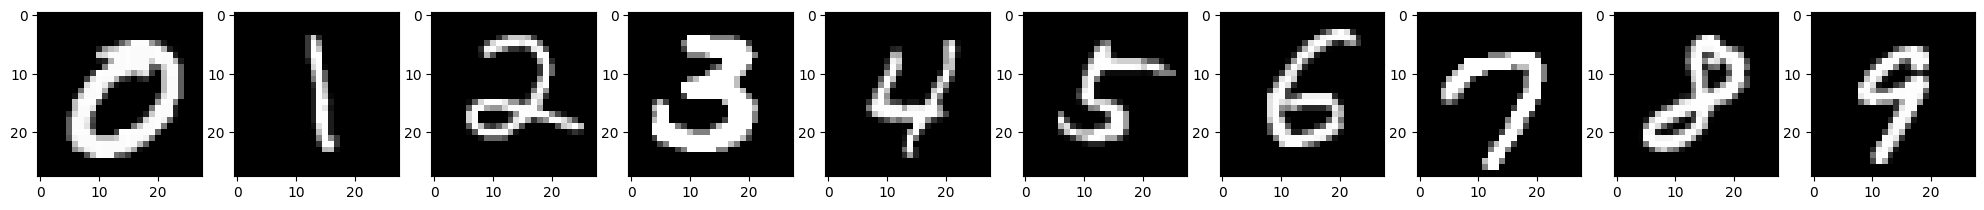

In [3]:
# вывод изображений каждого класса для ознакомления с датасетом

fig, axs = plt.subplots(1, 10, figsize=(25,3)) # создаем полотно для 10 графиков с размером 25 на 3
for i in range(10):
  label_indexes = np.where(y_train == i)[0] # получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # выбирает случайный индекс из списка созданного выше
  img = x_train[index] # выбираем из x_train нужное положение
  axs[i].imshow(Image.fromarray(img), cmap='gray') # выводим изображение

plt.show()

In [4]:
# добавляем размерность массиву mnist, чтобы сеть поняла что это чб
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# преобразуем выборки с ответами в OHE
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# посмотрим форматы выборок перед обучением
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print()
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)

y_train: (60000, 10)
y_test: (10000, 10)


In [5]:
# Ваше решение
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    BatchNormalization,
    Dropout,
    Flatten,
    Dense,
)
from tensorflow.keras.optimizers import Adam


In [6]:
model = Sequential(
    [
        Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), padding="valid", activation="relu"),

        Flatten(),

        Dense(256, activation="relu"),
        Dropout(0.2),
        Dense(10, activation="softmax"),
    ]
)
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

/home/aledonio/.cache/pypoetry/virtualenvs/global-cKEoLTwX-py3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1743421616.770190   76342 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [7]:
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.15,
    verbose=1,
)

Epoch 1/15


I0000 00:00:1743421621.361204   76540 service.cc:148] XLA service 0x7ff71c00af40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743421621.361285   76540 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
I0000 00:00:1743421621.655895   76540 cuda_dnn.cc:529] Loaded cuDNN version 90300


 28/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5362 - loss: 2.0451

I0000 00:00:1743421626.517489   76540 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


399/399 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.8850 - loss: 0.4544 - val_accuracy: 0.9852 - val_loss: 0.0500
Epoch 2/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9861 - loss: 0.0481 - val_accuracy: 0.9872 - val_loss: 0.0461
Epoch 3/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9914 - loss: 0.0272 - val_accuracy: 0.9879 - val_loss: 0.0458
Epoch 4/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9926 - loss: 0.0208 - val_accuracy: 0.9886 - val_loss: 0.0408
Epoch 5/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9945 - loss: 0.0173 - val_accuracy: 0.9879 - val_loss: 0.0455
Epoch 6/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9956 - loss: 0.0126 - val_accuracy: 0.9876 - val_loss: 0.0521
Epoch 7/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9947 - loss: 0.0168 - val_accuracy: 0.9890 - val_loss: 0.0489
Epoch 8/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9956 - loss: 0.0137 - val_accuracy: 0.9889 - va

In [8]:
_, acc = model.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9908 - loss: 0.0449


In [9]:
print(
    f"Точность модели на обучающей выборке: {history.history['accuracy'][-1]:.4f}\n"
    f"Точность модели на проверочной выборке: {history.history['val_accuracy'][-1]:.4f}\n"
    f"Точность модели на тестовой выборке: {acc:.4f}"
)


Точность модели на обучающей выборке: 0.9972
Точность модели на проверочной выборке: 0.9916
Точность модели на тестовой выборке: 0.9928


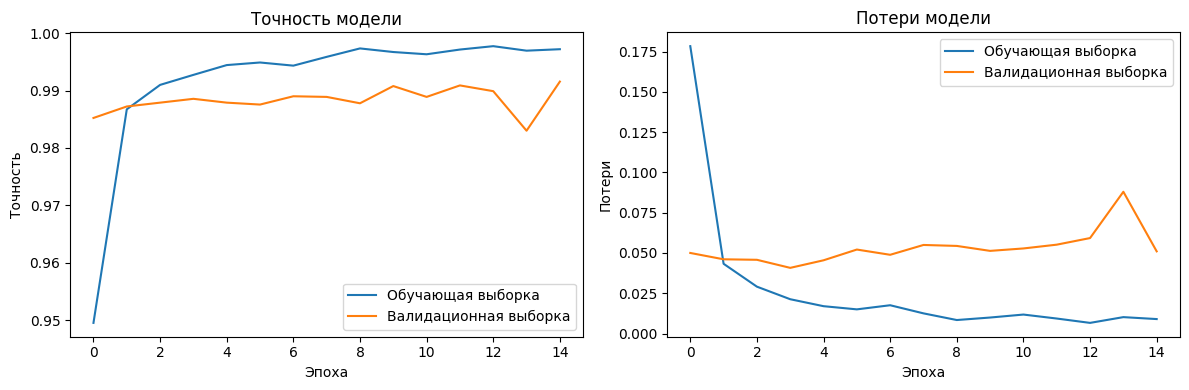

In [10]:
# вывод графиков точности и ошибки
plt.figure(figsize=(12, 4))

# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Обучающая выборка")
plt.plot(history.history["val_accuracy"], label="Валидационная выборка")
plt.title("Точность модели")
plt.xlabel("Эпоха")
plt.ylabel("Точность")
plt.legend()

# График потерь
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Обучающая выборка")
plt.plot(history.history["val_loss"], label="Валидационная выборка")
plt.title("Потери модели")
plt.xlabel("Эпоха")
plt.ylabel("Потери")
plt.legend()

plt.tight_layout()
plt.show()
